# <p style="text-align: center;"> Social Butterfly - Umbrella Academy - Sentiment Analysis </p>

![title](Images\Title_Images\Sentiment_Analysis.png)

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
   - ### 1.3 [Settings for Sentiment Analysis](#Settings_for_Sentiment)
   - ### 1.4 [Stream Listener](#Stream_Listener)
   - ### 1.5 [Dataset Summary](#dataset_summary)
   - ### 1.6 [Dataset Cleaning](#dataset_cleaning)
- ## 2. [Sentiment Distribution](#Sentiment_Distribution)
   - ### 2.1 [TextBlob](#Textblob)
   - ### 2.2 [Tokenization](#Tokenization)
   - ### 2.3 [Stemming](#Stemming)
   - ### 2.4 [Understanding sentiments using Wordcloud](#wc)
   - ### 2.5 [Understanding the impact of Hashtags on tweets sentiment](#hash)
- ## 3. [LSTM Modeling](#lstm)
- ## 4. [Conclusion](#Conclusion)
- ## 5. [Contribution](#Contribution)
- ## 6. [Citation](#Citation)
- ## 7. [License](#License)

# <p style="text-align: center;"> 1.0 Introduction </p> <a id='Introduction'></a>

# 1.1 Abstract <a id='abstract'></a>

In the previous notebook we applied the lstm model on our dataset.(go to the [Link](After_Metadata_Git.ipynb) if you haven't seen it yet). 

In this notebook we will be exploring sentiment analysis, gensim and text blob open source libraries and how can they be useful for us in our text generation.

Natural Language Processing (NLP) is an area of growing attention due to increasing number of applications like chatbots, machine translation etc. In some ways, the entire revolution of intelligent machines in based on the ability to understand and interact with humans. In this notebook , we have performed sentiment analysis on the real time tweets that we collected using stream listener. Then we found sentiment for each tweet and compared the tweets on the basis of the sentiments recieved. We used textblob to find the context of the inputted document we formed using tweets . After this we used a gensim word2vec model to find words with similar meaning and then we employed LSTM modeling for finding the sentiment of inputted texts that we will be employing on text generated  (extracted from part 2 i.e After MetaData of the project) in order to see what influence it will have on people. The following notebook can also be used for finding influencers that has most impact on twitter over all. 

[Back to top](#Introduction)

# 1.2 Importing Libraries <a id='importing_libraries'></a>

In this step, we import libraries that we need for this notebook. A few basic libraries like numpy, pandas, matplotlib etc are used. Other libraries like tweepy, json, csv are used to collect data from twitter and save them as a json and csv file. Libraries like base

[Back to top](#Introduction)

In [1]:
#Basic Python arrays and dataframe
import numpy as np
import pandas as pd

#Plotting and visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

#WordCloud
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

#twitter api
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
   
#time based and os dependent functionality
import time
import os

# Utility
from collections import Counter
import logging
import seaborn as sns
import pickle
import itertools

#Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf

#regex string commands 
import re,string

#Data Extraction and saving
import json
import tweepy
import csv

#To encode and decode strings
import codecs

#NLTK Stemming
from nltk.stem.porter import *

#Ignore warnings in outputs
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

#Twitter Credentials
twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = '2eKSRZ4rCtvI0P530zEmjEeIE'
twitter_cred['CONSUMER_SECRET'] = 'OUVG2jcIjRRuVvJ053RRuwPyAKxt9QXGz7GeKh35V24RsfO5Ep'
twitter_cred['ACCESS_KEY'] = '1392379572-rAHYsSNQCfEmcQndKMBqtIsp018Tb95mz1E9Jyy'
twitter_cred['ACCESS_SECRET'] = 'esUTGAcsgNhHPcEE3qwQd2Y6yL1sun3baRx02YmrUy83z'

Using TensorFlow backend.
C:\Users\Rushabh\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
# Saving the Twitter Credentials to a json file
script_dir = os.path.dirname('__file__')
file_path = os.path.join(script_dir, 'JSON_and_CSV_Files/twitter_credentials.json')
with open(file_path, 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
    

In [3]:
with open('JSON_and_CSV_Files/twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rushabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1.3 Settings for Sentiment Analysis<a id='Settings_for_Sentiment'></a>

[Back to top](#Introduction)

In [5]:
# DATASET
DATASET_ENCODING = "utf-8"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# 1.4 Stream Listener<a id='Stream_Listener'></a>

Setting up the Stream Listener for Twitter Sentiment Analysis.

[Back to top](#Introduction)

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [7]:
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'User_verified',
                             'fav_count', 'rt_count', 'tweet_date'])

In [8]:
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i+=1
        if i == 1000:
            break
        else:
            pass

In [9]:
stream(data = ['AI','ML','BigData','DataScience'], file_name = 'JSON_and_CSV_Files/tweets_sentiment')

# 1.5 Dataset Summary <a id='dataset_summary'></a>

Since this dataset is scraped from twitter, it is bound to have some irregular values. In this step we check the summary of the dataset by checking the first 5 columns of the scraped data, checking the data types of the columns and checking the mathematical summary of the dataset

[Back to top](#Introduction)

In [10]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,RT @RetweetedRajeev: A Radiologist’s Explorati...,Machine Learning,223119,8646,The Earth,False,0,1,2019-04-27 03:20:45
1,RT @RetweetedRajeev: Which one is your favorit...,Mr Data Scientist,59313,2160,"Melbourne, Victoria",False,0,1,2019-04-27 03:20:40
2,RT @rbukralia: Which one is your favorite deep...,Mr Data Scientist,59313,2160,"Melbourne, Victoria",False,0,3,2019-04-27 03:20:34
3,RT @rbukralia: Which one is your favorite deep...,MUDAC 2019,27,12,"Mankato, MN",False,0,3,2019-04-27 03:18:23
4,Which one is your favorite deep learning frame...,RR,9705,138,,False,1,1,2019-04-27 03:18:18


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Tweets                 1000 non-null object
User                   1000 non-null object
User_statuses_count    1000 non-null object
user_followers         1000 non-null object
User_location          1000 non-null object
User_verified          1000 non-null object
fav_count              1000 non-null object
rt_count               1000 non-null object
tweet_date             1000 non-null object
dtypes: object(9)
memory usage: 118.1+ KB


In [12]:
df.describe()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,468,467,466,432,291,2,22,49,992
top,RT @AISOMA_AG: The Future of Data Science\n\nM...,Chidambara .ML.,600147,4509,,False,0,2,2019-04-26 06:14:40
freq,67,52,52,52,213,993,826,142,2


# 1.6 Dataset Cleaning <a id='dataset_cleaning'></a>
Since this dataset is scraped from twitter, it is bound to have some irregular values. By seeing the summary of our dataset we have gained some important insight about the type of data, and we need to clean the data to be able to further process it. The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

It is done in this project in five parts

> Removing Twitter Handles (@user)

> Removing Punctuations, Numbers, and Special Characters

> Removing Short Words

> Tokenization

> Stemming

[Back to top](#Introduction)

In [13]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'
    

In [14]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'] = df['clean_tweet'].str.replace("#", " ")
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))

In [15]:
#printing particular tweet
n=20
print('Original tweet:\n'+ df['Tweets'][n])
print('Clean tweet:\n'+df['clean_tweet'][n])
print('Sentiment:\n'+df['Sentiment'][n])

Original tweet:
RT @AAlnaggar: What’s the #AI potential for #marketing professionals ?#l

#socialmedia #digitalmarketing #contentmarketing #SEO #growthhack…
Clean tweet:
What potential marketing professionals socialmedia digitalmarketing contentmarketing growthhack
Sentiment:
Neutral


# <p style="text-align: center;"> 2.0 Sentiment Distribution </p> <a id='Sentiment_Distribution'></a>

[Back to top](#Introduction)

# 2.1 What is TextBlob?  <a id='Textblob'></a>
TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. TextBlob, which is built on the shoulders of NLTK and Pattern. A big advantage of this is, it is easy to learn and offers a lot of features like sentiment analysis, pos-tagging, noun phrase extraction, etc. It has now become my go-to library for performing NLP tasks.

#### TextBlob for Sentiment Analysis
Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

>Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

>Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

#### Creating a short summary of a text

In [16]:
df['clean_tweet'].to_csv('output.txt', sep=' ', index=False)

In [17]:
def load_doc(filename):
# open the file as read only
    file = open(filename, 'r')
# read all text
    text = file.read()
# close the file
    file.close()
    return text

Since we had series of cleaned tweets , so we made them in a text file and converted them in string , because textblob works with string type. Then we did some cleaning by removing some meaningless words. And we had built in function , that explains the context of our document . Since, it's just a machine it cannot tell us an appropriate value but it can give us an explicit idea of how what could the context of our text be.

In [18]:
# load
in_filename = 'LSTM_Files/output.txt'
doc = load_doc(in_filename)

In [19]:
lines = doc.split('\n')
filtered_words = [word for word in lines if word not in stopwords.words('english')]
lines_string = ''.join(str(e) for e in filtered_words)

#### Finding Context of the Input text using text blob

In [21]:
import random
from textblob import Word
blob = TextBlob(lines_string)
nouns = list()
for word, tag in blob.tags:
    if tag == 'NN':
        nouns.append(word.lemmatize())

print ("This text is about...")
for item in random.sample(nouns, 10):
    word = Word(item)
    print (word.pluralize())


This text is about...
founders
healthTecs
technologies
responsibilities
ecomms
ecomms
artificialintelligences
artificialintelligences
businesses
cybersecurities


## **PS**
We have plotted these graphs on plot.ly, so they don't load on opening up the Jupyter Notebook, and require us to run the notebook again. We have plotted these graphs and saved them under the Plots_and_Graphs folder in Images. You can check the graphs out there, or run the notebook again till the point of running the graph.

In [22]:

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [23]:
df['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title='Overall Sentiment Distribution')

In [24]:
df_popular = df[df['rt_count'] >= 100]
df_popular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title = 'Sentiment Distribution for <br> popular tweets (Above 100)')


In [25]:
df_unpopular = df[df['rt_count'] <= 100]
df_unpopular['Sentiment'].value_counts().iplot(kind='bar', xTitle='Sentiment',
                                    yTitle='Count', title = ('Sentiment Distribution for <br> unpopular tweets '))


In [26]:
#correlation between Tweeting Frequency and Followers
#Plot the number of statuses per user vs. number of followers per user.
#Differentiate between verified and non-verified users in our plot.

df.iplot(x='User_statuses_count', y = 'user_followers', mode='markers'
        , categories='User_verified',layout=dict(
        xaxis=dict(type='log', title='No. of Statuses'),
        yaxis=dict(type='log', title='No. of followers'),
        title='No. of statuses vs. No. of followers'))

# 2.2 Tokenization <a id='Tokenization'></a>

Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

[Back to top](#Sentiment_Distribution)

In [29]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [technology, advancements, will, have, huge, i...
1    [Books, DataScientists, https, Weyt, abdsc, Bi...
2    [What, potential, marketing, professionals, so...
3    [Books, DataScientists, https, Weyt, abdsc, Bi...
4    [Books, DataScientists, https, Weyt, abdsc, Bi...
Name: clean_tweet, dtype: object

# 2.3 Stemming <a id='Stemming'></a>

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

[Back to top](#Sentiment_Distribution)


In [30]:
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [technolog, advanc, will, have, huge, impact, ...
1    [book, datascientist, http, weyt, abdsc, bigda...
2    [what, potenti, market, profession, socialmedi...
3    [book, datascientist, http, weyt, abdsc, bigda...
4    [book, datascientist, http, weyt, abdsc, bigda...
Name: clean_tweet, dtype: object

In [31]:
#put tokens back together.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

#df_cleans['Tokenized_tweets']= tokenized_tweet[i]

# 2.4 Understanding the common words used in the tweets: WordCloud<a id='wc'></a>

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

In [32]:
Stopwords_Updated = ('amp', 'gt', 'via' ,'de','https')

In [33]:
STOPWORDS=STOPWORDS.union(Stopwords_Updated)

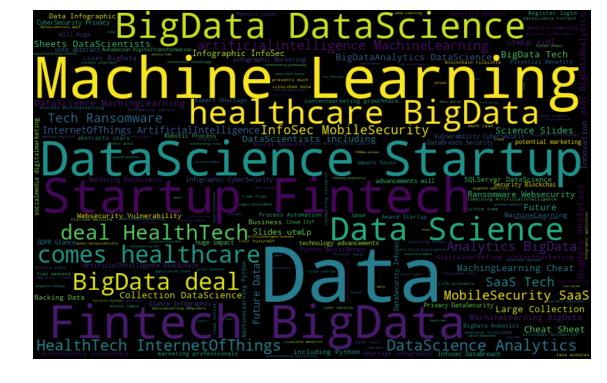

In [34]:
all_words = ' '.join([text for text in df['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS,random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


***We can see most of the words are positive or neutral. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not) in our train data.***

We will be using cat coding and one hot encoding for converting sentiment to integer value, cat coding converts categorical data into numeric for use , basically it provides numbers for ordinal data. Cat coding creates a mapping of our sortable categories, e. g. old < renovated < new → 0, 1, 2

One hot encoding (binary values from categorical data) A one hot encoding is a representation of categorical variables as binary vectors. This first requires that the categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.



In [35]:
df['sentiment_label'] = df['Sentiment'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


#### Words with positive sentiment (=2)

Here we see we got the words which formulates the context for which we are doing sentiment analysis

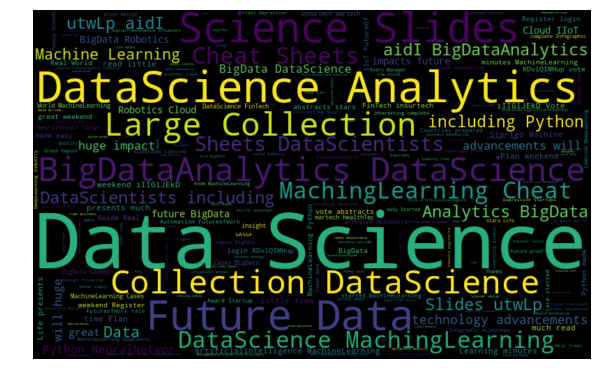

In [36]:
normal_words =' '.join([text for text in df['clean_tweet'][df['sentiment_label'] == 2]])

wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS,random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Words with negative sentiment (=0)

Here we see we got the words which doesn't formulates the context for which we are doing sentiment analysis

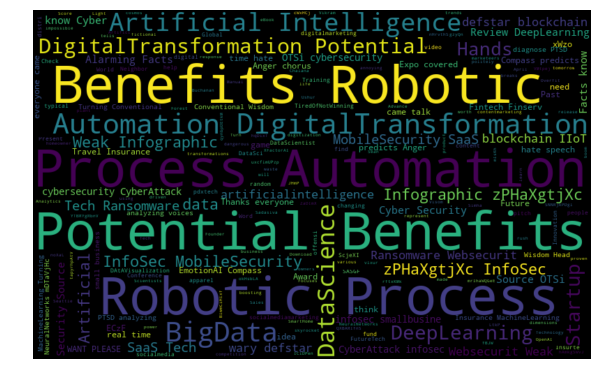

In [37]:
normal_words =' '.join([text for text in df['clean_tweet'][df['sentiment_label'] == 0]])

wordcloud = WordCloud(width=800, height=500, stopwords=STOPWORDS,random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 2.5 Understanding the impact of Hashtags on tweets sentiment<a id='hash'></a>

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [38]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['Tweets'][df['sentiment_label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['Tweets'][df['sentiment_label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

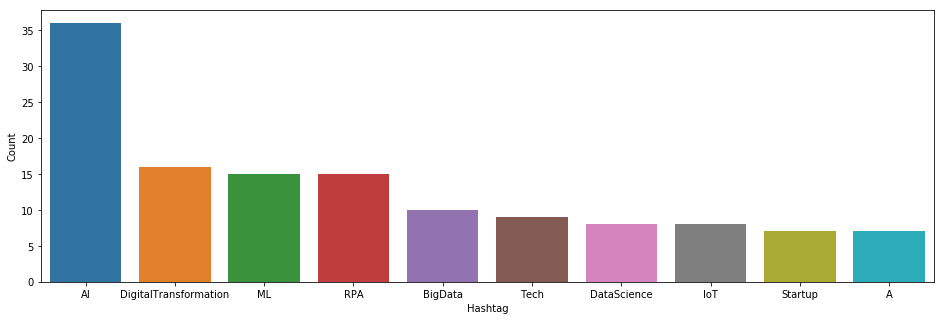

In [39]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Defining test and train data from our given dataset for modeling of data

In [40]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 800
TEST size: 200


In [41]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment,sentiment_label
0,RT @Thomas_Harrer: Six #technology advancement...,Norry Shauck,16485,511,Soon to be florida,False,0,32,2019-04-27 01:40:11,technology advancements will have huge impacts...,Positive,2
1,RT @KirkDBorne: Books for #DataScientists: htt...,Camilo Contreras,11381,422,Bogotá,False,0,11,2019-04-27 01:35:55,Books DataScientists https Weyt abdsc BigData ...,Neutral,1
2,RT @AAlnaggar: What’s the #AI potential for #m...,Web ROI Agency,6070,5016,"New York, NY",False,0,15,2019-04-27 01:26:11,What potential marketing professionals socialm...,Neutral,1
3,RT @KirkDBorne: Books for #DataScientists: htt...,Curious Luke,47657,1619,Switzerland,False,0,11,2019-04-27 01:18:05,Books DataScientists https Weyt abdsc BigData ...,Neutral,1
4,RT @KirkDBorne: Books for #DataScientists: htt...,AKDM bot!,133444,1278,United States,False,0,11,2019-04-27 01:17:42,Books DataScientists https Weyt abdsc BigData ...,Neutral,1


In [42]:
documents = [_text.split() for _text in df_train.clean_tweet] 

Some Important features about Gensim Library:- 

>Gensim is a free Python library designed to automatically extract semantic topics from documents, as efficiently (computer-wise) and painlessly (human-wise) as possible.

>Gensim is designed to process raw, unstructured digital texts (“plain text”).

>The algorithms in Gensim, such as Word2Vec, FastText, Latent Semantic Analysis (LSI, LSA, see LsiModel), Latent Dirichlet Allocation (LDA, see LdaModel) etc, automatically discover the semantic structure of documents by examining statistical co-occurrence patterns within a corpus of training documents. These algorithms are unsupervised, which means no human input is necessary – you only need a corpus of plain text documents.

>Once these statistical patterns are found, any plain text documents (sentence, phrase, word…) can be succinctly expressed in the new, semantic representation and queried for topical similarity against other documents (words, phrases…).



A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning. Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words. Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word. It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

#### Explaination Regarding word2vec model
Gensim provides the Word2Vec class for working with a Word2Vec model.Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space

In [43]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [44]:
w2v_model.build_vocab(documents)

In [45]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 164


In [46]:
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(73425, 260960)

#### By modeling we found similar meaning words which can be found using underneath function

In [47]:
w2v_model.most_similar("machinelearning")

[('DeepLearning', 0.9974768757820129),
 ('from', 0.9970517158508301),
 ('bigdata', 0.9966920018196106),
 ('learning', 0.9958268404006958),
 ('deep', 0.9956953525543213),
 ('datascience', 0.9948705434799194),
 ('SQLServer', 0.9948614835739136),
 ('artificialintelligence', 0.9948409795761108),
 ('Enterprise', 0.9944727420806885),
 ('most', 0.9942511320114136)]

![Victory](Images\GIFs\giphy.gif)

# 3 LSTM Modeling <a id='lstm'></a>

Back to top

The word embedding layer expects input sequences to be comprised of integers. We can map each word in our vocabulary to a unique integer and encode our input sequences. Later, when we make predictions, we can convert the prediction to numbers and look up their associated words in the same mapping.

To do this encoding, we will use the Tokenizer class in the Keras API.

First, the Tokenizer must be trained on the entire training dataset, which means it finds all of the unique words in the data and assigns each a unique integer.
We can then use the fit Tokenizer to encode all of the training sequences, converting each sequence from a list of words to a list of integers.

#### ***For information on LSTM modeling refer to part 2 After Metadata of this project***

In [48]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 1525


In [49]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_tweet), maxlen=SEQUENCE_LENGTH)

In [50]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(1525, 300)


In [51]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [52]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          457500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 618,001
Trainable params: 160,501
Non-trainable params: 457,500
_________________________________________________________________


#### Model Parameters:-
>Activation Function: We have used ReLU as the activation function. ReLU is a non-linear activation function, which helps complex relationships in the data to be captured by the model.

>Optimiser: We use adam optimiser, which is an adaptive learning rate optimiser.

>Loss function: We will train a network to output a probability over the 10 classes using Cross-Entropy loss, also called Softmax Loss. It is very useful for multi-class classification.

In [53]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [54]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

As we increase the batch size the time for training would reduce but it will require additional computational capacity. Hence it is a trade-off between computation capacity and time for training.

The training is set to run for 1024 epochs. One epoch would mean that the network has seen the entire training data once. As we increase the number of epochs there is a risk that the model will overfit to the training data. Hence to prevent the model from overfitting we can enable early stopping.By using following code

> earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

Early stopping is a method that allows us to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out/validation dataset.


In [55]:
y_train = df_train.sentiment_label.tolist()
y_test = df_test.sentiment_label.tolist()
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 720 samples, validate on 80 samples
Epoch 1/8
720/720 [==============================] - 6s 8ms/step - loss: 0.6788 - acc: 0.3653 - val_loss: 0.6137 - val_acc: 0.5750
Epoch 2/8
720/720 [==============================] - 6s 8ms/step - loss: 0.5950 - acc: 0.5472 - val_loss: 0.5476 - val_acc: 0.5750
Epoch 3/8
720/720 [==============================] - 6s 8ms/step - loss: 0.5139 - acc: 0.5486 - val_loss: 0.4790 - val_acc: 0.5750
Epoch 4/8
720/720 [==============================] - 5s 7ms/step - loss: 0.4269 - acc: 0.5486 - val_loss: 0.4052 - val_acc: 0.5750
Epoch 5/8
720/720 [==============================] - 6s 8ms/step - loss: 0.3343 - acc: 0.5486 - val_loss: 0.3240 - val_acc: 0.5750
Epoch 6/8
720/720 [==============================] - 5s 8ms/step - loss: 0.2340 - acc: 0.5486 - val_loss: 0.2363 - val_acc: 0.5750


#### Evaluation



In [84]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

200/200 [==============================] - 1s 4ms/step

ACCURACY: 0.5950000286102295
LOSS: 0.06432200223207474


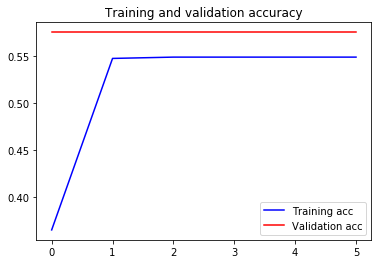

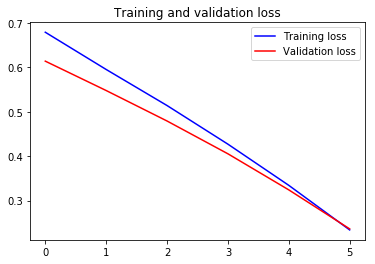

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

#### Plot 1
If validation accuracy is lower than training, then we are overfitting. And Val. Acc > Train Acc. implies Underfitting.The key technique to avoiding underfitting is using a model with plenty of layers and parameters, and picking an appropriate architecture (e.g. CNN with batchnorm for images). Also picking appropriate learning rates.
Picking the output with the highest validation accuracy is generally a good approach.

#### Plot 2
As for losses are concerned we can see that data is not being overfitted because the training loss is decreasing at almost the same rate as the validation loss and by the end they align with each other.Since there are no point of inflection we can say that for the number of epochs we ran the model, it is not overfitting. If in case it overfits, we will be observing a divergence in loss between val and train very early

#### Predicting the context of the text whether it is positive or negative in aspect of our moto by the help of model trained.

In [97]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE


In [59]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  


In [60]:
predict("HealthVerity wants to enable healthcare's big data future")

{'label': 'NEUTRAL',
 'score': 0.684390127658844,
 'elapsed_time': 0.06918120384216309}

In [61]:
predict("India vs Pakistan match is tomorrow")

{'label': 'NEUTRAL',
 'score': 0.5225074887275696,
 'elapsed_time': 0.030811786651611328}

![Victory](Images\GIFs\tenor.gif)

In [95]:
y_pred_1d = []
y_test_1d = list(df_test.sentiment_label)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]


200/200 [==============================] - 1s 4ms/step


# <p style="text-align: center;">3.0 Conclusion<p><a id='Conclusion'></a>
  
1. As we scrapped the data for given list of hashtags, we found that the sentiment is mostly positive or neutral than negative.
2. When we employed text blob, it was giving us 70% accuracy in aspect of knowing the data.
3. We employed Gensim, and with it's help we were able to find similar meaning words i.e. 'machinelearning' returned python, datascience, deep learing and so on.
4. The model on the test set of 3 class sentiment classification provides a result of 59.5 %accuracy.
5. We modeled the data and achieved 50% accuracy, but that was not the aim, we are seeking a balance between generalization and on overfitting and getting a 50% accuracy is also a good enough measure.
    
[Back to top](#Introduction)

# <p style="text-align: center;">4.0 Contribution<p><a id='Contribution'></a>

    
- Code by self : 55%
- Code from external Sources : 45%

[Back to top](#Introduction)

# <p style="text-align: center;"> 5.0 Citations:<p><a id='Citation'></a>
1. https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py
2. https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings
3. https://github.com/bear/python-twitter/blob/master/twitter/parse_tweet.py
4. https://gist.github.com/dreikanter/2787146
5. https://docs.python.org/3.4/howto/unicode.html
6. https://www.kaggle.com/eliasdabbas/extract-entities-from-social-media-posts
7. https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis
8. https://www.kaggle.com/githubsearch/twitter-sentimental-analysis

[Back to top](#Introduction)

# <p style="text-align: center;"> 6.0 License<p><a id='License'></a>
Copyright (c) 2019 Rushabh Nisher, Manali Sharma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[Back to top](#Introduction)